# Random Forest Classifier - Car Evaluation Dataset

## 1. Importing Data and Python Packages

In [2]:
#Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from warnings import filterwarnings 
filterwarnings('ignore')

In [3]:
#Import the data into a pandas dataframe
df = pd.read_csv(r'E:/IITm/Sem 7/Data Analytics Lab/Assignment 5 Nov 14th/car_evaluation.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## 2. Data Cleaning and Exploration

In [4]:
#Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df.shape

(1728, 7)

There are 1728 instances and 7 variables in this dataset.

In [6]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,5more,more,med,high,unacc
freq,432,432,432,576,576,576,1210


In [7]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']

for col in col_names:
    
    print(df[col].value_counts()) 

high     432
med      432
vhigh    432
low      432
Name: buying, dtype: int64
high     432
med      432
vhigh    432
low      432
Name: maint, dtype: int64
5more    432
2        432
3        432
4        432
Name: doors, dtype: int64
more    576
2       576
4       576
Name: persons, dtype: int64
med      576
small    576
big      576
Name: lug_boot, dtype: int64
high    576
med     576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


The variables `doors` and `persons` are categorical in nature.

**Summary of the variables**
* There are 7 variables in the dataset. All the variables are of categorical data type.
* These are given by `buying`,`maint`,`doors`,`persons`,`lug_boot`,`safetyand`, `class`.
* `class` is the <font color = red>**target variable**</font>.

Explore `class` variable.

In [8]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

The `class` variable is ordinal in nature.

**Missing values in variables**

In [9]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset.

**Declaring target variable and feature vector**

In [10]:
X = df.drop(['class'], axis=1)

y = df['class']

## 3. Model 

### 3.1 Split data into separate training and test set 

In [11]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 40)

In [12]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

### 3.2 Feature Engineering

In [13]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

**Encode categorical variables**

In [14]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
660,high,med,2,4,med,low
1447,low,high,3,4,big,med
829,high,low,4,more,small,med
1336,low,vhigh,3,4,med,med
581,high,high,3,4,med,high


The variables are ordinal categorical data type.

In [15]:
# import category encoders

import category_encoders as ce

In [16]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [17]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
660,1,1,1,1,1,1
1447,2,2,2,1,2,2
829,1,3,3,2,3,2
1336,2,4,2,1,1,2
581,1,2,2,1,1,3


In [18]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
237,4,1,1,2,1,1
854,1,3,4,1,2,3
752,1,1,4,2,1,3
1674,2,3,3,3,3,1
189,4,2,4,3,3,1


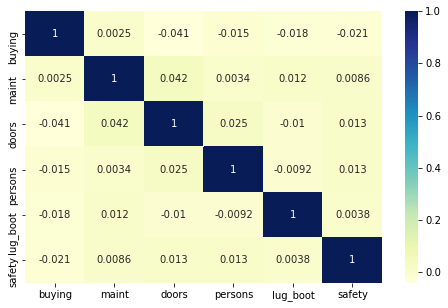

In [19]:
Selected_features = ['buying','maint','doors','persons','lug_boot','safety']
X1 = X_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X1.corr(), annot=True, cmap="YlGnBu")
plt.show()

## 4. Random Forest Classifier

### 4.1 Random Forest Classifier with default parameters

In [20]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=2)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9650


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

Here, I have built the Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

### 4.2 Random Forest Classifier model with parameter n_estimators=100

In [21]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9685


The model accuracy score with 10 decision-trees is 0.9650 but the same with 100 decision-trees is 0.9685. So, as expected accuracy increases with number of decision-trees in the model.

### 4.3 Find important features with Random Forest model 

Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.

First, I will create the Random Forest model as follows:-

In [22]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [23]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.277133
persons     0.231920
buying      0.185422
maint       0.152966
lug_boot    0.082892
doors       0.069668
dtype: float64

We can see that the most important feature is `safety` and least important feature is `doors`.

**Visualize feature scores of the features**

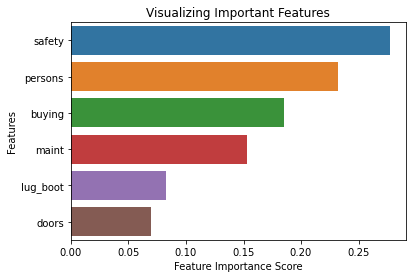

In [24]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

### 4.4 Build Random Forest model on selected features

Drop the least important feature, `doors`

In [25]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [26]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Now, I will build the random forest model and check accuracy.

In [27]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [33]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)


# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test,y_pred)+0.05))

Model accuracy score with doors variable removed : 0.9764


Having removed the `doors` variable and rebuilt the Random Forest model, we see that the model accuracy is 0.9764. The accuracy of the model with all the variables was 0.9685, so the model accuracy has improved a little bit by removing the `doors` variable.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

For this, we can use the `Confusion matrix`

### 4.5 Confusion Matrix

In [34]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

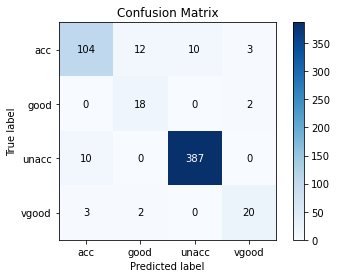

In [35]:
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_test, y_pred)

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))